In [13]:
# Install required libraries
!pip install pandas scikit-learn matplotlib seaborn

In [14]:
# Import necessary libraries
import pandas as pd
import numpy as np

In [15]:
# Load the dataset
df = pd.read_csv('/content/Maternal Health Risk Data Set.csv')

# Display the first few rows of the dataset
df.head()

,Age,SystolicBP,DiastolicBP,BS,BodyTemp,HeartRate,RiskLevel
0,25,130,80,15.0,98.0,86,high risk
1,35,140,90,13.0,98.0,70,high risk
2,29,90,70,8.0,100.0,80,high risk
3,30,140,85,7.0,98.0,70,high risk
4,35,120,60,6.1,98.0,76,low risk


In [16]:
# Data Preprocessing
# Check for missing values and display the count
print("Missing values before handling:")
print(df.isnull().sum())

Missing values before handling:
Age            0
SystolicBP     0
DiastolicBP    0
BS             0
BodyTemp       0
HeartRate      0
RiskLevel      0
dtype: int64


In [17]:
#number of values in each column
df.count()

,0
Age,1014
SystolicBP,1014
DiastolicBP,1014
BS,1014
BodyTemp,1014
HeartRate,1014
RiskLevel,1014


In [18]:
# Separate features and target variable
X = df.drop('RiskLevel', axis=1)
y = df['RiskLevel']

# Display features and target variable
print("\nFeatures:")
print(X.head())
print("\nTarget:")
print(y.head())


Features:
   Age  SystolicBP  DiastolicBP    BS  BodyTemp  HeartRate
0   25         130           80  15.0      98.0         86
1   35         140           90  13.0      98.0         70
2   29          90           70   8.0     100.0         80
3   30         140           85   7.0      98.0         70
4   35         120           60   6.1      98.0         76

Target:
0    high risk
1    high risk
2    high risk
3    high risk
4     low risk
Name: RiskLevel, dtype: object


In [19]:
# Preprocess numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

# Define preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()


Logistic Regression Evaluation:
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203

Accuracy: 0.6502463054187192
Precision: 0.6593971992902409
Recall: 0.6502463054187192
F1 Score: 0.6120297148334531


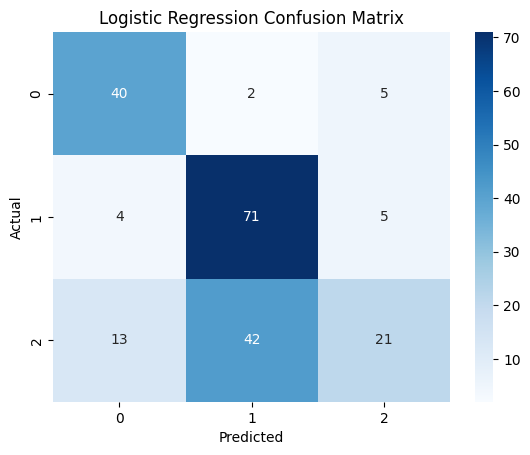

In [21]:
#Model 1: Logistic Regression

from sklearn.linear_model import LogisticRegression

# Define and train the model
model = LogisticRegression(max_iter=1000)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nLogistic Regression Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Logistic Regression Confusion Matrix")



Random Forest Evaluation:
              precision    recall  f1-score   support

   high risk       0.85      0.85      0.85        47
    low risk       0.88      0.76      0.82        80
    mid risk       0.76      0.87      0.81        76

    accuracy                           0.82       203
   macro avg       0.83      0.83      0.83       203
weighted avg       0.83      0.82      0.82       203

Accuracy: 0.8226600985221675
Precision: 0.829457192585973
Recall: 0.8226600985221675
F1 Score: 0.8229032905154513


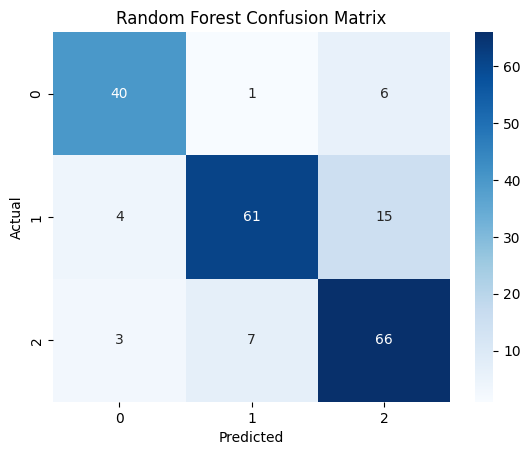

In [22]:
#Model 2: Random Forest

from sklearn.ensemble import RandomForestClassifier

# Define and train the model
model = RandomForestClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nRandom Forest Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Random Forest Confusion Matrix")



Gradient Boosting Evaluation:
              precision    recall  f1-score   support

   high risk       0.83      0.83      0.83        47
    low risk       0.73      0.76      0.74        80
    mid risk       0.72      0.68      0.70        76

    accuracy                           0.75       203
   macro avg       0.76      0.76      0.76       203
weighted avg       0.75      0.75      0.75       203

Accuracy: 0.7487684729064039
Precision: 0.7486902807099851
Recall: 0.7487684729064039
F1 Score: 0.7483625641741707


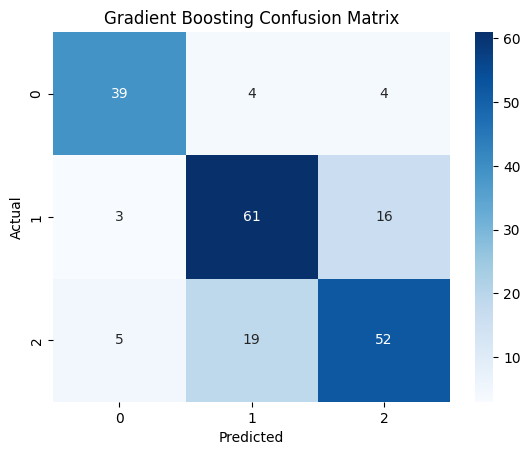

In [23]:
#Model 3: Gradient Boosting

from sklearn.ensemble import GradientBoostingClassifier

# Define and train the model
model = GradientBoostingClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nGradient Boosting Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Gradient Boosting Confusion Matrix")



AdaBoost Evaluation:
              precision    recall  f1-score   support

   high risk       0.82      0.66      0.73        47
    low risk       0.72      0.72      0.73        80
    mid risk       0.61      0.68      0.65        76

    accuracy                           0.69       203
   macro avg       0.72      0.69      0.70       203
weighted avg       0.70      0.69      0.70       203

Accuracy: 0.6945812807881774
Precision: 0.7036267138434321
Recall: 0.6945812807881774
F1 Score: 0.69643113617261


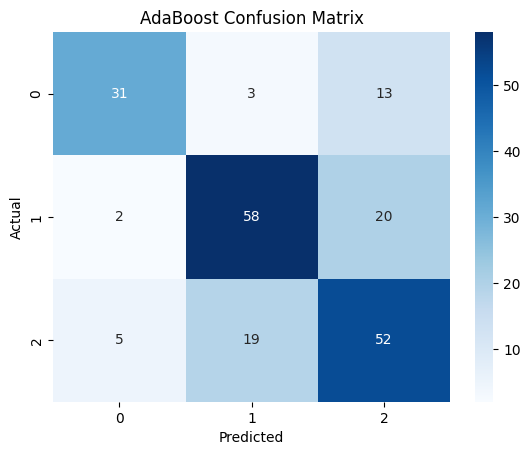

In [24]:
# Model 4: AdaBoost
from sklearn.ensemble import AdaBoostClassifier

# Define and train the model
model = AdaBoostClassifier()
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nAdaBoost Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "AdaBoost Confusion Matrix")



Support Vector Classifier Evaluation:
              precision    recall  f1-score   support

   high risk       0.80      0.85      0.82        47
    low risk       0.61      0.88      0.72        80
    mid risk       0.74      0.37      0.49        76

    accuracy                           0.68       203
   macro avg       0.72      0.70      0.68       203
weighted avg       0.70      0.68      0.66       203

Accuracy: 0.6798029556650246
Precision: 0.7009638038123795
Recall: 0.6798029556650246
F1 Score: 0.6577936816116694


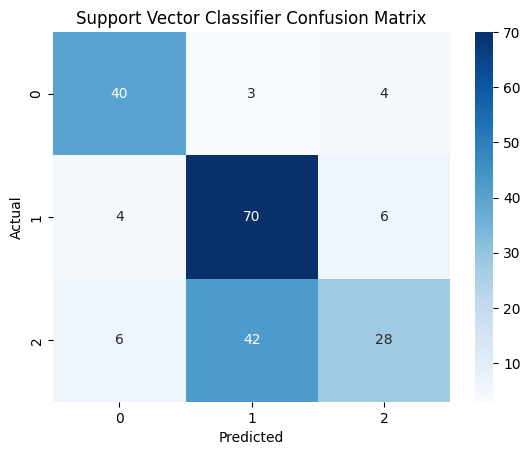

In [25]:
# Model 5: Support Vector Classifier
from sklearn.svm import SVC

# Define and train the model
model = SVC(probability=True)
pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nSupport Vector Classifier Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Support Vector Classifier Confusion Matrix")



Ensemble Model Evaluation:
              precision    recall  f1-score   support

   high risk       0.84      0.89      0.87        47
    low risk       0.78      0.82      0.80        80
    mid risk       0.79      0.71      0.75        76

    accuracy                           0.80       203
   macro avg       0.80      0.81      0.81       203
weighted avg       0.80      0.80      0.80       203

Accuracy: 0.7980295566502463
Precision: 0.7977861489423355
Recall: 0.7980295566502463
F1 Score: 0.7965568026001726


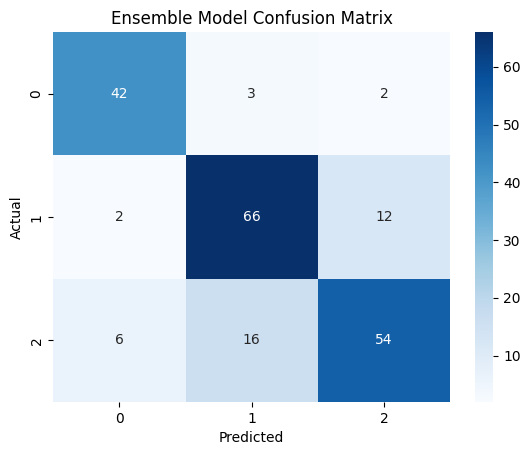

In [26]:
#Ensemble Model
from sklearn.ensemble import VotingClassifier

# Define and train the ensemble model
ensemble_model = VotingClassifier(
    estimators=[
        ('lr', LogisticRegression(max_iter=1000)),
        ('rf', RandomForestClassifier()),
        ('gb', GradientBoostingClassifier()),
        ('adb', AdaBoostClassifier()),
        ('svc', SVC(probability=True))
    ],
    voting='soft'
)

pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', ensemble_model)])
pipeline.fit(X_train, y_train)
y_pred = pipeline.predict(X_test)

# Evaluation
print("\nEnsemble Model Evaluation:")
print(classification_report(y_test, y_pred))
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred, average='weighted'))
print("Recall:", recall_score(y_test, y_pred, average='weighted'))
print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot Confusion Matrix
plot_confusion_matrix(y_test, y_pred, "Ensemble Model Confusion Matrix")



Logistic Regression Evaluation:
              precision    recall  f1-score   support

   high risk       0.70      0.85      0.77        47
    low risk       0.62      0.89      0.73        80
    mid risk       0.68      0.28      0.39        76

    accuracy                           0.65       203
   macro avg       0.67      0.67      0.63       203
weighted avg       0.66      0.65      0.61       203

Accuracy: 0.6502463054187192
Precision: 0.6593971992902409
Recall: 0.6502463054187192
F1 Score: 0.6120297148334531

Random Forest Evaluation:
              precision    recall  f1-score   support

   high risk       0.87      0.85      0.86        47
    low risk       0.86      0.78      0.82        80
    mid risk       0.75      0.84      0.80        76

    accuracy                           0.82       203
   macro avg       0.83      0.82      0.82       203
weighted avg       0.82      0.82      0.82       203

Accuracy: 0.8177339901477833
Precision: 0.8225713473795315
Reca

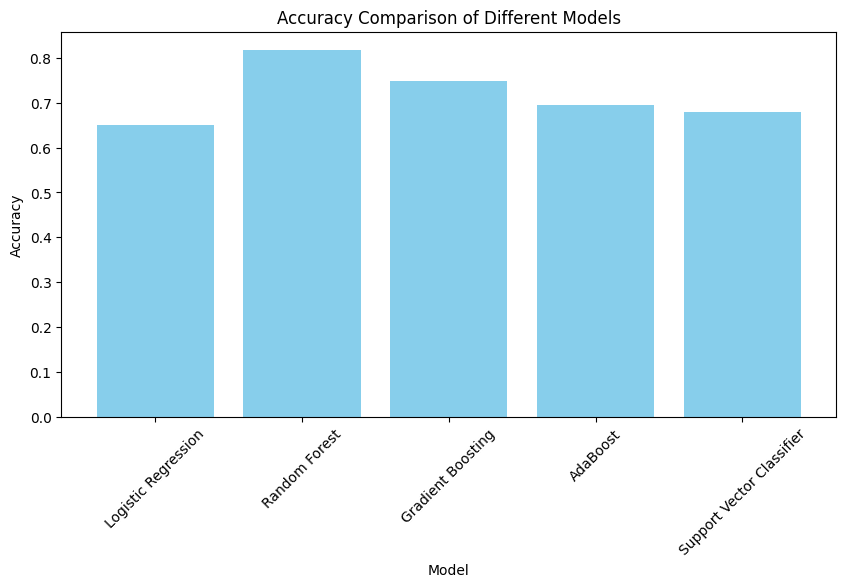

In [27]:
# Define models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000),
    'Random Forest': RandomForestClassifier(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'AdaBoost': AdaBoostClassifier(),
    'Support Vector Classifier': SVC(probability=True)
}

# Train and evaluate models
accuracies = {}

for name, model in models.items():
    pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('classifier', model)])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)

    # Evaluation
    print(f"\n{name} Evaluation:")
    print(classification_report(y_test, y_pred))
    accuracy = accuracy_score(y_test, y_pred)
    accuracies[name] = accuracy
    print("Accuracy:", accuracy)
    print("Precision:", precision_score(y_test, y_pred, average='weighted'))
    print("Recall:", recall_score(y_test, y_pred, average='weighted'))
    print("F1 Score:", f1_score(y_test, y_pred, average='weighted'))

# Plot accuracy comparison
plt.figure(figsize=(10, 5))
plt.bar(accuracies.keys(), accuracies.values(), color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.show()